In [ ]:
# import the required library
import pandas as pd 

#read train.csv as dataFrame
#the first parameter is the path where train.csv is stored
#the second parameter(list of string), to specify the columns names
train = pd.read_csv("train.csv" , names = ["id", "sample", "label"])

#print the number of unique rows based on "sample" column 
print (len ( set (train["sample"])))


1877


In [ ]:
# drop duplicated rows based on "sample" column
train = train.drop_duplicates(subset=['sample'])

# if you want to convertet back to CSV
# 1st parameter is the path, 2nd for removing the indecies added to the dataFrame
train.to_csv("/content/new_train.csv", index = False )

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder


In [ ]:
test = pd.read_csv("/content/play_tennis.csv")

In [ ]:
test

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Evaluation Criteria:



1.   Entropy:
\begin{align}
Entropy(S) = - \sum_{i=1}^c p_i \log p_i
\end{align}

2.   MCE:

\begin{align}
MCE(S,x) = 1 - max( p_1 , p_2 ,..., p_n)
\end{align}

3.  Gini: 

\begin{align}
Gini(S) = 1−  \sum_{i=1}^n p_i^2 
\end{align}






In [305]:
#MAX_DEPTH = 10

class Dtree :
  def __init__(self , X , y , depth=0,
               features = None , label = None,
               feature = None, Type = None,
               AllFeatures = None, value =None, NextSplitBy = None ):
    
        self.children = {}
        self.X = X
        self.y = y
        
        # if features == None:
        #   self.features = set (self.X.columns)
        # else:
        self.AllFeatures = AllFeatures
        
        self.NextSplitBy = NextSplitBy

        self.feature = feature
        self.value = value

        #calculated from root node and set to children
        self.expectedValues = None 

        # if label == None:
        #   self.label = max (dict (self.y.value_counts()))
        # else:
        self.label = label

        self.Type = Type

        self.IGScore = None


        #self.MAX_DEPTH = MAX_DEPTH
        self.depth = depth

        #self.classes = y.unique()

        #This the root node
        self.Bulid()


  def Bulid (self):

    #self.feature , self.IGScore = self.MakeSplitDecision(self.AllFeatures)
    #possibleValues = self.X[self.feature].unique()

    if len (self.y.unique()) == 1:
      self.label = self.y.unique()[0]
      self.Type = "leaf"
      return 

    if len(self.AllFeatures) == 0:
      self.label = max (dict (y.value_counts()))
      self.Type = "leaf"
      return

    
    if len(self.y.unique()) > 1: # or self.depth < self.MAX_DEPTH:   #stopping critera
    
        self.NextSplitBy , self.IGScore = self.MakeSplitDecision(self.AllFeatures)
        
        if self.feature == None:
          print ("No best Feature were found")

        possibleValues = self.X[self.NextSplitBy].unique()

        for v in possibleValues:
          
          SubsetX = self.X[self.X[self.NextSplitBy] == v] # return rows where feature == specific values
          SubsetY = self.y[SubsetX.index]
          
          if len(SubsetX) == 0:
            print("No rows left, len(SubsetX) is 0 ")

          # if len(SubsetX) == 0:
          m = self.AllFeatures - {self.NextSplitBy}       

          print(self.AllFeatures ,"\n" , {self.feature}, "\n" , m ,"\n", len(SubsetX) , "\n", v )

          child = Dtree(SubsetX.copy() , SubsetY.copy() ,
                        self.depth+1 ,
                        label = max (dict (SubsetY.value_counts())),
                        AllFeatures = m,
                        feature = self.NextSplitBy,
                        value = v,
                        Type = "internal"
                        )
          # else:
            
          #   #print(self.AllFeatures , self.feature)
          #   m = self.AllFeatures - {self.feature}

          #   print(self.AllFeatures ,"\n" , {self.feature}, "\n" , m ,"\n", len(SubsetX) , "\n", v )
            
          #   child = Dtree(SubsetX.copy() , SubsetY.copy() , self.depth+1,
          #               features = m,
          #               TargetFeature = self.feature,
          #               label = max (dict (SubsetY.value_counts()))
          #               )
            #print (1)
          self.children[v]= child # append to children
        
        for v in possibleValues:          
          self.children[v].Bulid()
            

            

    return self

# day	  outlook	  temp	humidity	wind	  play
# D1	  Sunny	    Hot	  High	    Weak	  No
  
  def predict (self , df):
    """ recieves a dataframe and returns a list of predictions """

    #c=0
    predictions =[]
    for indx in range(len(df)):

        pred = self.predictOne(dict(df.iloc[indx]).copy()) 

        #print(indx , ": ", pred , res )
        predictions.append(pred)

    return predictions





  def predictOne(self , row) -> str:

  
    # if (len (row) == 0):
    #   print("len (row) == 0")
    #   return max (dict (self.y.value_counts())) #self.label

    # if self == None :
    #   print("self is none")
    #   return max (dict (self.y.value_counts())) #self.label

    # if len (tree.children) == 0: #self.NextSplitBy == None and 
    #   return max (dict (tree.y.value_counts())) #self.label    #return the highest class appeared in the list


      node = self
      label = "Undefined"

      while (node is not None ):


        
        if len(node.children) != 0 :


              # print("y counts", dict (tree.y.value_counts()))
              # print("child counts", dict (node.y.value_counts()))
              # print("val :" , tree.value)
              # print("child len: ", len(tree.children) )
              # print("children:",tree.children )
              # print("row len: ", len(row))
              # print("row :", row )
              # print("child:" , node)
              # print("child children:", node.children) 
              # print("")

              branchName = row[node.NextSplitBy]
              child = node.children[branchName] 
              row.pop (node.NextSplitBy)

              node = child #.predictOne(row)
              # label = node.label

        else:
              # print("child is none: ", max(dict (node.y.value_counts())))
              # print("label ", node.label)
              
              label = node.label
              break


      return label #max(dict (child.y.value_counts())) #self.label

    # print("NextSplitBy: " , tree.NextSplitBy )
    # print("branchName: " , branchName )
    
      

      






  def MakeSplitDecision (self , features):
    """
    Perform spliting on the tree until:
        1- the maximum depth is reached, 
        2- one class remains, or
        3- A performance metric is achieved.
    """
    #determine the best split based on the features

    BestFeature = None
    BestInformationGain = -1

    for f in features:      
      IG = self.CalculateIG(f)

      if BestInformationGain < IG:
        BestFeature = f
        BestInformationGain = IG

    return BestFeature, BestInformationGain 


  def prettyPrint(self):
    print(self.feature , self.label , self.depth)
    

    for child in self.children.values():
      child.prettyPrint()


  def CalculateIG(self , feature):
    """
      loop over attribute's values to calculate the maximum Information Gain.
    """

    #Get unique values for that attributes:
    Xtemp = self.X.copy()
    ytemp = self.y.copy()

    PossibleValuesForFeature= Xtemp[feature].unique()

    IG = self.Entropy(Xtemp, ytemp)

    for value in PossibleValuesForFeature:
      SubsetX = Xtemp[Xtemp[feature] == value] # return rows where feature == specific values
      SubsetY = ytemp [SubsetX.index]

      IG -=  (SubsetX.shape[0] / Xtemp.shape[0]) * self.Entropy(SubsetX, SubsetY) 

    return IG


  def GiniIndex(self):
    pass

  def Entropy(self, XTemp , yTemp):
    """
    For attribute x_i, calculate the value of entropy 
    """

    entropy = 0
    for c in yTemp.unique(): #returns the rows where class = c   
      splitCandidate= XTemp[yTemp[:] == c] 
      ratio = len(splitCandidate) / len(XTemp)
      
      entropy += ratio * np.log2(ratio)

    return -1 * entropy #take every class i and do (- p_i .log p_i)

    

  def MCE(self):
    """
     - Miss-Classification Error(MCE): measures the amount
     of samples that classified with an incorrect label. 

     - calculating the MCE for each attributes (A) then 
     the attribute with minimum MCEis selected at each node.
    """
    pass




1.   implement Chi Square
2.   implement other error metrics
3.   when a value for an attribute is not present, Try Catch
4.   Test on the problem

In [307]:
X = test[["outlook" , "temp" ,"humidity", "wind"]]
y = test["play"]

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [ ]:
tree = Dtree(X_train , y_train , AllFeatures= set(X.columns) , value = None , Type = "root")

In [313]:
tree.predict(X_test)

['Yes', 'Yes', 'Yes']

In [314]:
y_test

8    Yes
6    Yes
4    Yes
Name: play, dtype: object

In [ ]:
tree.prettyPrint()

In [320]:
import scipy.stats

#find Chi-Square critical value
scipy.stats.chi2.ppf(1- 0.025, df=2)

7.377758908227871

In [ ]:
test

In [280]:
m =  {'humidity': 'High',
     'outlook': 'Sunny',
     'temp': 'Hot',
     'wind': 'Strong'
     }

In [303]:
preds = tree.predict(X_test)
preds

0 :  Yes No
1 :  Yes No
2 :  Yes No
3 :  Yes No
4 :  Yes No


['Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [304]:
y_test

8     Yes
6     Yes
4     Yes
11    Yes
2     Yes
Name: play, dtype: object

In [ ]:
dict(X.iloc[0]).copy()

In [ ]:

def printLevelOrder(root):
     
    # Base case
    if root is None:
        return
    q = []
     
    # Enqueue root and initialize height
    q.append(root)
         
    while q:

        count = len(q)

        while count > 0:
            temp = q.pop(0)
            print(temp.feature +"/"+ temp.label+"/"+  , end= "   " )
            


            for child in temp.children.values():
              q.append(child)
 
            count -= 1
        print(' ')

In [ ]:
printLevelOrder(tree)

outlook/Yes    
humidity/Yes   outlook/Yes   wind/Yes    
humidity/No   humidity/Yes   wind/Yes   wind/No    


In [ ]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [ ]:
if [1]:
  print("d")

d


In [ ]:
X = test[["outlook" , "temp" ,"humidity", "wind"]]
y = test["play"]

1.0

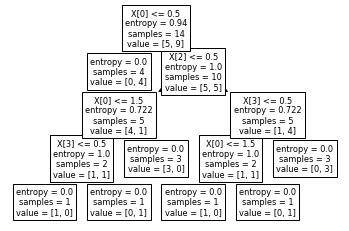

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
PlayTennis = test.copy()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['wind'] = Le.fit_transform(PlayTennis['wind'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])


y = PlayTennis['play']
X = PlayTennis.drop(['play' , "day"],axis=1)

# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

tree.plot_tree(clf)

X_pred = clf.predict(X)
sum (X_pred == y) / len(X_pred)

In [ ]:
X.columns

Index(['outlook', 'temp', 'humidity', 'wind'], dtype='object')

In [ ]:
clf.feature_importances_


array([0.51455805, 0.        , 0.21123658, 0.27420537])

In [57]:
import numpy as np

In [304]:
def chi (values):
  # sum =0
  # for item in values:
  #   sum += (((item[0] - item[1])**2 )/item[1])



  li= [(((item[0] - item[1])**2 )/item[1]) for item in val]

  print ("values : " ,li)

  return   sum(li)


In [305]:
val = [[6 , 5.14] , [2 , 2.85] ,[3 , 3.85] , [3 , 2.14] ]
chi(val)

values :  [0.1438910505836577, 0.25350877192982463, 0.1876623376623377, 0.3456074766355139]


0.9306696368113339

In [300]:
def gini (val):
  
  res = []
  for item in val:

    s = item.sum()
    total = 0
    print("1 - ", end="")
    for i in item:

      if not (i == 0 or s ==0):
        total += (i/ s) **2
      else:
        total +=0

      
      print("(" , i , "/" , s,")**2 + " , end="")


    res.append(1- total )
    print("=" , 1 - total , "\n")




  return res

In [301]:
v = np.array([[40,40] , [20,40] , [20,0]])
gini(v)

1 - ( 40 / 80 )**2 + ( 40 / 80 )**2 + = 0.5 

1 - ( 20 / 60 )**2 + ( 40 / 60 )**2 + = 0.4444444444444444 

1 - ( 20 / 20 )**2 + ( 0 / 20 )**2 + = 0.0 



[0.5, 0.4444444444444444, 0.0]

In [255]:
def MCE (val):
  
  res = []
  for item in val:

    s = item.sum()
    total = [(i/ s) for i in item]
    res.append(1- max( total) )

    print("1 - max(" , total , ") = ", 1- max( total) )

  return res

In [256]:
val = np.array([[40,40] , [30 ,10] , [10,30]])
MCE(val)

1 - max( [0.5, 0.5] ) =  0.5
1 - max( [0.75, 0.25] ) =  0.25
1 - max( [0.25, 0.75] ) =  0.25


[0.5, 0.25, 0.25]

In [274]:
def Entropy (val):
  
  res = []
  for item in val:

    # s = item.sum()
    # total = [(i/ s)* np.log2(i / s) for i in item]


    s = item.sum() # [40 , 40] -> 80
    total = 0
    for i in item:
      d = i / s
      if(d != 0):
        total += (i/ s) * np.log2(i / s)

        print("(", i,"/",s,")", "*", np.log2(d) , end=" +  " )

      else:
        total += 0

    

    res.append(-1 * total )
    print(" = ", -1 * total, "\n")


  return res

In [275]:
val  = np.array([[40,40] , [20 ,40] , [20,0] ])
Entropy(val)


( 40 / 80 ) * -1.0 +  ( 40 / 80 ) * -1.0 +   =  1.0 

( 20 / 60 ) * -1.5849625007211563 +  ( 40 / 60 ) * -0.5849625007211563 +   =  0.9182958340544896 

( 20 / 20 ) * 0.0 +   =  -0.0 



[1.0, 0.9182958340544896, -0.0]

In [302]:
def IG (imp , values):

  impList =[]

  if imp == "MCE" or imp == "mce":
    impList = MCE(values)
  elif imp == "entropy" or imp == "Entropy":
    impList = Entropy(values)
  elif imp == "gini" or imp == "Gini":
    impList = gini(values)
  else:
    print("enter a valid entropy name , {MCE,entropy,Gini} ")


  finalRes = impList[0]
  rootSum = values[0].sum()

  impList = impList[1:]
  values  = values[1:]
    #print(values)

  print("")
  print("{:.2f}".format(finalRes), end=" - ")  
  for i in range(len(values)):
    finalRes -= (values[i].sum()/rootSum) * impList[i]

    if i !=  len(values) -1 :
      print("(" , values[i].sum(), "/" ,rootSum  , " * ",  "{:.2f}".format(impList[i] ),end=") + ")
    else:
      print("(" , values[i].sum(), "/" , rootSum  , " * ",  "{:.2f}".format(impList[i] ),end=") =  ")

  return finalRes

In [303]:
val  = np.array([[40,40] ,  [30,10] , [10,30]])
IG("gini",val)

1 - ( 40 / 80 )**2 + ( 40 / 80 )**2 + = 0.5 

1 - ( 30 / 40 )**2 + ( 10 / 40 )**2 + = 0.375 

1 - ( 10 / 40 )**2 + ( 30 / 40 )**2 + = 0.375 


0.50 - ( 40 / 80  *  0.38) + ( 40 / 80  *  0.38) =  

0.125

In [294]:
val  = np.array([[40,40] ,  [20,40] , [20,0]])
IG("gini",val)

1 - ( 40 / 80 )**2 =  0.25
1 - ( 40 / 80 )**2 =  0.5

1 - ( 20 / 60 )**2 =  0.1111111111111111
1 - ( 40 / 60 )**2 =  0.5555555555555556

1 - ( 20 / 20 )**2 =  1.0
1 - ( 0 / 20 )**2 =  1.0


0.50 - ( 60 / 80  *  0.44) + ( 20 / 80  *  0.00) =  

0.16666666666666669